<a href="https://colab.research.google.com/github/khadija267/Sign-Language-Classification/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

In [ ]:
# import important libraries
import PIL
import os
from PIL import Image
import os
import skimage.io as skio
from skimage.transform import resize
import numpy as np
import pandas as pd
# import colab drive to access my drive and the data uploaded there.
from google.colab import drive
drive.mount('/content/drive')
# get the location of the data
location = r'/content/drive/MyDrive/CVProjectDataset'
# make array of the classes of the data
classes=['Call me','Dislike','Goodjob','Good luck','I love you','OK','Peace','Power','Talk to the hand','You']
# make a list of the folders that contain the data
folders=['Train','Test','Validation']
# make empty lists to append to them each image
X_train=[]
X_test=[]
X_valid=[]
y_train=[]
y_test=[]
y_valid=[]
train_df=[]
# for looping the folders and making a train, validation, and test images arrays
for ind,it in enumerate(classes):
    for ind_1 , it_1 in enumerate(folders):
        for filex in os.listdir(location+"/"+it+"/"+it_1):
            if it_1=='Train':
                f_img = location+"/"+it+"/"+it_1+"/"+filex
                img = skio.imread(f_img)
                img = resize(img,(40,32))
                X_train.append(img)
                y_train.append(ind)
                train_df.append(img.flatten())

            elif it_1=='Test':
                f_img =location+"/"+it+"/"+it_1+"/"+filex
                img = skio.imread(f_img)
                img = resize(img,(40,32))
                X_test.append(img)
                y_test.append(ind)


            elif it_1=='Validation':
                f_img = location+"/"+it+"/"+it_1+"/"+filex
                img = skio.imread(f_img)
                img = resize(img,(40,32))
                X_valid.append(img)
                y_valid.append(ind)

            else:
                print("The destination file does not exist!")


# make a df for the data if needed in the further steps
df=pd.DataFrame(train_df)
df['Class']=y_train

Mounted at /content/drive


Make sure of the data size

In [ ]:
len(X_train[0][0])

32

In [ ]:
len(X_train)

327

In [ ]:
len(X_test)

100

In [ ]:
len(X_valid)

100

In [ ]:
len(y_train)

327

convert the list into a numpy array that is used in further modeling

In [ ]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
X_train = np.asarray(X_train)
X_test = np.asarray(X_test) 


# VGG16 Model Baseline

In [ ]:
# import keras from tensorflow as needed to import the vgg16 model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras.models import Model
from keras.layers import Dense, Activation, Flatten
# load model without classifier layers
model = VGG16(include_top=False, input_shape=X_train[0].shape)
# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(10, activation='softmax')(class1)
# define new model
model = Model(inputs=model.inputs, outputs=output)
# summarize
model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 40, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 40, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 40, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 20, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 20, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 20, 16, 128)       147584    
                                                              

In [ ]:
import tensorflow.keras
y_train_k = tensorflow.keras.utils.to_categorical(y_train, num_classes=10)
y_test_k = tensorflow.keras.utils.to_categorical(y_test, num_classes=10)

sgd = tensorflow.keras.optimizers.SGD(lr=0.0008)
model.compile(loss='categorical_crossentropy', 
                           optimizer=sgd, 
                           metrics=['accuracy'])


history = model.fit(X_train, y_train_k, batch_size=128, epochs=50, verbose=1, 
                                 validation_data=(X_test, y_test_k))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
3/3 [==============================] - 36s 11s/step - loss: 2.3786 - accuracy: 0.2477 - val_loss: 2.3221 - val_accuracy: 0.2900
Epoch 2/50
3/3 [==============================] - 37s 11s/step - loss: 2.3102 - accuracy: 0.2416 - val_loss: 2.2695 - val_accuracy: 0.2900
Epoch 3/50
3/3 [==============================] - 36s 11s/step - loss: 2.2534 - accuracy: 0.3547 - val_loss: 2.2193 - val_accuracy: 0.3900
Epoch 4/50
3/3 [==============================] - 35s 11s/step - loss: 2.2001 - accuracy: 0.3517 - val_loss: 2.1690 - val_accuracy: 0.2400
Epoch 5/50
3/3 [==============================] - 40s 12s/step - loss: 2.1463 - accuracy: 0.2844 - val_loss: 2.1221 - val_accuracy: 0.2000
Epoch 6/50
3/3 [==============================] - 34s 11s/step - loss: 2.0951 - accuracy: 0.2661 - val_loss: 2.0747 - val_accuracy: 0.2600
Epoch 7/50
3/3 [==============================] - 35s 11s/step - loss: 2.0432 - accuracy: 0.2691 - val_loss: 2.0266 - val_accuracy: 0.2700
Epoch 8/50
3/3 [===========

In [ ]:
history.history['accuracy']

[0.24770642817020416,
 0.241590216755867,
 0.35474005341529846,
 0.3516819477081299,
 0.2844036817550659,
 0.26605504751205444,
 0.269113153219223,
 0.269113153219223,
 0.29663607478141785,
 0.3608562648296356,
 0.4097859263420105,
 0.47400611639022827,
 0.5321100950241089,
 0.5657492280006409,
 0.5963302850723267,
 0.5963302850723267,
 0.6452599167823792,
 0.6850152611732483,
 0.7125382423400879,
 0.7370030283927917,
 0.7951070070266724,
 0.8623853325843811,
 0.8776758313179016,
 0.9113149642944336,
 0.9113149642944336,
 0.9051987528800964,
 0.9510703086853027,
 0.9480122327804565,
 0.9541284441947937,
 0.9480122327804565,
 0.9541284441947937,
 0.9694189429283142,
 0.9785932898521423,
 0.9816513657569885,
 0.9816513657569885,
 0.9908257126808167,
 0.9908257126808167,
 0.9908257126808167,
 0.9877675771713257,
 0.9847095012664795,
 0.9969419240951538,
 1.0,
 0.9908257126808167,
 1.0,
 0.9969419240951538,
 1.0,
 0.9969419240951538,
 1.0,
 1.0,
 1.0]

In [ ]:
y_predict_prob = model.predict(X_test)
y_predict = y_predict_prob.argmax(axis=-1)

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_test, y_predict)
conf_mx

array([[ 8,  0,  0,  0,  0,  2,  0,  0,  0,  0],
       [ 0, 10,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  9,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 10,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  9,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 10,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 10,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 10]])

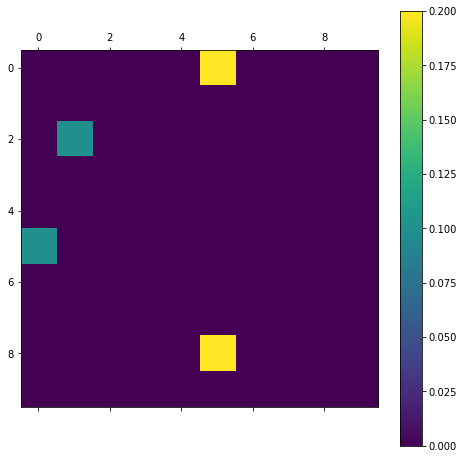

In [ ]:

import matplotlib.pyplot as plt

def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)
    
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plot_confusion_matrix(norm_conf_mx)
plt.show()

> The model mistakens the class 5 and 1

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       0.69      0.90      0.78        10
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        10
           8       1.00      0.80      0.89        10
           9       1.00      1.00      1.00        10

    accuracy                           0.94       100
   macro avg       0.95      0.94      0.94       100
weighted avg       0.95      0.94      0.94       100



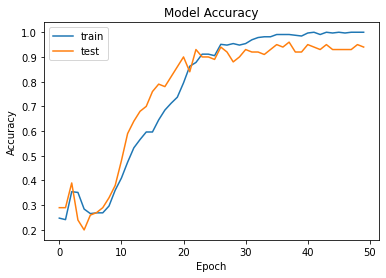

In [ ]:
k = ''
if 'accuracy' in history.history :
    k = 'accuracy'    

if 'acc' in history.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


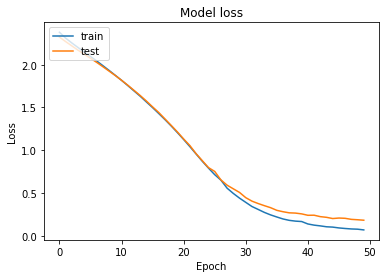

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



The model is a good fit, as the training loss at the beginnig is high but it's decreasing while the model sees more examples, while the validation loss started high and it's decreasing over examples. 

# VGG16 with data augmentation

In [ ]:
# make a df of X_train and y_train to make it easy to select each class then to apply augmentation for each class individually
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3801,3802,3803,3804,3805,3806,3807,3808,3809,3810,3811,3812,3813,3814,3815,3816,3817,3818,3819,3820,3821,3822,3823,3824,3825,3826,3827,3828,3829,3830,3831,3832,3833,3834,3835,3836,3837,3838,3839,Class
0,0.302022,0.309865,0.298529,0.298836,0.306679,0.297059,0.293934,0.301777,0.290012,0.287745,0.295588,0.283824,0.282843,0.290686,0.278922,0.276654,0.284498,0.272733,0.268995,0.276838,0.265074,0.267586,0.275429,0.263664,0.268566,0.278983,0.264216,0.271569,0.279412,0.267647,0.269424,0.279105,0.265196,0.267708,0.275919,0.263725,0.266728,0.270588,0.258456,0.262071,...,0.686458,0.717831,0.742402,0.524449,0.579289,0.615870,0.358946,0.436581,0.492157,0.239767,0.339461,0.411581,0.158333,0.278922,0.365135,0.110478,0.246814,0.339461,0.109314,0.206985,0.291054,0.106250,0.139583,0.193321,0.051961,0.075490,0.122610,0.047181,0.064400,0.086949,0.057843,0.062439,0.067341,0.067647,0.065196,0.050184,0.077451,0.066667,0.043627,0
1,0.328922,0.348529,0.332843,0.322549,0.342157,0.326471,0.315502,0.335110,0.319424,0.314216,0.333824,0.315135,0.306373,0.325980,0.313297,0.298529,0.318137,0.302451,0.284130,0.303738,0.288051,0.282904,0.302512,0.286826,0.287745,0.307292,0.291605,0.291176,0.311765,0.296078,0.293321,0.313909,0.298223,0.291176,0.313725,0.298039,0.285846,0.304963,0.293750,0.275184,...,0.863603,0.857721,0.840196,0.776287,0.786397,0.782047,0.571936,0.608517,0.620772,0.441422,0.502206,0.533762,0.362439,0.444301,0.495282,0.238542,0.337868,0.402696,0.175061,0.263113,0.344485,0.151164,0.210110,0.305576,0.114093,0.161703,0.247365,0.088419,0.114400,0.184130,0.067770,0.075245,0.124755,0.067157,0.054718,0.082782,0.087868,0.064828,0.074081,0
2,0.297488,0.305331,0.293566,0.295588,0.303431,0.291667,0.290686,0.298529,0.286765,0.285784,0.293627,0.281863,0.281863,0.289706,0.277941,0.281679,0.289522,0.277757,0.267586,0.275429,0.263664,0.259314,0.267157,0.255392,0.259314,0.267157,0.255392,0.259314,0.267157,0.255392,0.259314,0.267157,0.255392,0.259314,0.267157,0.255392,0.253064,0.262316,0.248652,0.232353,...,0.823529,0.817647,0.800123,0.720956,0.737990,0.733150,0.530576,0.574694,0.583027,0.386887,0.454902,0.483150,0.275735,0.370466,0.418076,0.174816,0.284681,0.345956,0.147488,0.240074,0.301593,0.106127,0.161336,0.207537,0.058456,0.108517,0.144853,0.045527,0.078431,0.100061,0.043934,0.062255,0.065012,0.063848,0.072365,0.053064,0.050368,0.050858,0.020466,0
3,0.293627,0.317157,0.317157,0.288725,0.312255,0.312255,0.281373,0.304902,0.304902,0.271569,0.295098,0.295098,0.266176,0.289706,0.289706,0.262745,0.284804,0.284804,0.258150,0.280208,0.280208,0.254963,0.278493,0.278493,0.254902,0.278431,0.278431,0.255086,0.278615,0.278615,0.257843,0.281373,0.281373,0.262316,0.285846,0.285846,0.262316,0.285355,0.283395,0.258027,...,0.677635,0.686091,0.704167,0.546998,0.574939,0.614645,0.350919,0.403370,0.465441,0.239400,0.316054,0.402328,0.175980,0.273958,0.382843,0.121385,0.240502,0.360539,0.111336,0.216728,0.348162,0.125429,0.196507,0.336213,0.117770,0.191850,0.321691,0.130821,0.212255,0.330453,0.123958,0.207108,0.307598,0.113235,0.198223,0.288603,0.128676,0.213051,0.294914,0
4,0.320588,0.336275,0.332353,0.314216,0.329902,0.325980,0.309314,0.325000,0.321078,0.312745,0.328431,0.324510,0.313235,0.328922,0.325000,0.310294,0.325980,0.322059,0.294056,0.309743,0.305821,0.287255,0.302941,0.299020,0.287255,0.302941,0.299020,0.287255,0.302941,0.299020,0.287255,0.302941,0.299020,0.287255,0.302941,0.299020,0.287194,0.297549,0.293260,0.284007,...,0.764154,0.731801,0.682292,0.790625,0.754718,0.707230,0.772181,0.739216,0.688725,0.730515,0.698162,0.652267,0.660049,0.633701,0.587990,0.619056,0.593627,0.547978,0.638174,0.570098,0.530699,0.674326,0.546201,0.508946,0.670037,0.562255,0.533762,0.449387,0.383272,0.369853,0.276471,0.256005,0.264338,0.295159,0.318505,0.346140,0.200919,0.259375,0.306434,0


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.002,
        height_shift_range=0.002,
         zoom_range=0.01,
         horizontal_flip=True,
        fill_mode='nearest')

In [ ]:
for layer in model.layers:
    layer.trainable = False
model = VGG16(include_top=False, input_shape=X_train[0].shape)
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(10, activation='softmax')(class1)

model_aug = Model(inputs=model.inputs, outputs=output)
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 40, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 40, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 40, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 20, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 20, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 20, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 10, 8, 128)        0     

In [ ]:
y_train_k = tensorflow.keras.utils.to_categorical(y_train, num_classes=10)
y_test_k = tensorflow.keras.utils.to_categorical(y_test, num_classes=10)

sgd = tensorflow.keras.optimizers.SGD(lr=0.0008)
model_aug.compile(loss='categorical_crossentropy', 
                           optimizer=sgd, 
                           metrics=['accuracy'])


history = model_aug.fit(datagen.flow(X_train, y_train_k), batch_size=128, epochs=50, verbose=1, 
                                 validation_data=(X_test, y_test_k))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
11/11 [==============================] - 49s 4s/step - loss: 2.2342 - accuracy: 0.1682 - val_loss: 2.2704 - val_accuracy: 0.1500
Epoch 2/50
11/11 [==============================] - 44s 4s/step - loss: 2.1082 - accuracy: 0.2783 - val_loss: 2.1750 - val_accuracy: 0.1700
Epoch 3/50
11/11 [==============================] - 46s 4s/step - loss: 1.9993 - accuracy: 0.3089 - val_loss: 2.0578 - val_accuracy: 0.2000
Epoch 4/50
11/11 [==============================] - 45s 4s/step - loss: 1.8578 - accuracy: 0.4037 - val_loss: 1.9115 - val_accuracy: 0.3500
Epoch 5/50
11/11 [==============================] - 41s 4s/step - loss: 1.6947 - accuracy: 0.4495 - val_loss: 1.7465 - val_accuracy: 0.3700
Epoch 6/50
11/11 [==============================] - 43s 4s/step - loss: 1.5267 - accuracy: 0.5168 - val_loss: 1.5831 - val_accuracy: 0.4500
Epoch 7/50
11/11 [==============================] - 41s 4s/step - loss: 1.3060 - accuracy: 0.6300 - val_loss: 1.3097 - val_accuracy: 0.6500
Epoch 8/50
11/11 [==

In [ ]:
y_predict_prob = model_aug.predict(X_test)
y_predict = y_predict_prob.argmax(axis=-1)

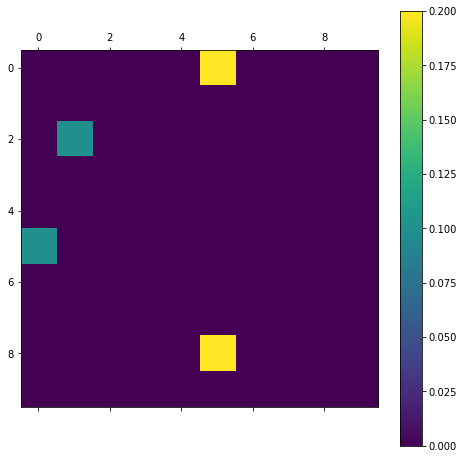

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plot_confusion_matrix(norm_conf_mx)
plt.show()

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       1.00      1.00      1.00        10
           2       0.83      1.00      0.91        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       0.88      0.70      0.78        10
           6       1.00      1.00      1.00        10
           7       0.77      1.00      0.87        10
           8       1.00      0.90      0.95        10
           9       1.00      1.00      1.00        10

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



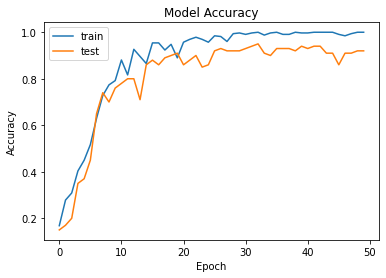

In [ ]:
k = ''
if 'accuracy' in history.history :
    k = 'accuracy'    

if 'acc' in history.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

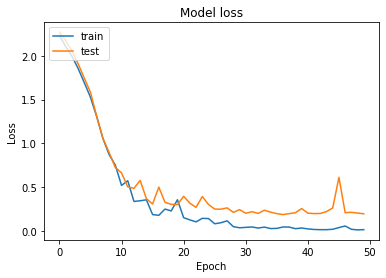

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



# VGG16 with data regularization

In [ ]:
from keras.layers import BatchNormalization
for layer in model.layers:
    layer.trainable = False
model = VGG16(include_top=False, input_shape=X_train[0].shape)
flat1 = Flatten()(model.layers[-1].output)
t=BatchNormalization()(flat1)
        
class1 = Dense(1024, activation='relu')(t)
tt=BatchNormalization()(class1)
output = Dense(10, activation='softmax')(tt)

model_reg = Model(inputs=model.inputs, outputs=output)
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 40, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 40, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 40, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 20, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 20, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 20, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 10, 8, 128)        0     

In [ ]:
y_train_k = tensorflow.keras.utils.to_categorical(y_train, num_classes=10)
y_test_k = tensorflow.keras.utils.to_categorical(y_test, num_classes=10)

sgd = tensorflow.keras.optimizers.SGD(lr=0.0008)
model_reg.compile(loss='categorical_crossentropy', 
                           optimizer=sgd, 
                           metrics=['accuracy'])


history = model_reg.fit(X_train, y_train_k, batch_size=128, epochs=50, verbose=1, 
                                 validation_data=(X_test, y_test_k))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
11/11 [==============================] - 42s 4s/step - loss: 1.3305 - accuracy: 0.5933 - val_loss: 2.1815 - val_accuracy: 0.1900
Epoch 2/50
11/11 [==============================] - 42s 4s/step - loss: 0.6333 - accuracy: 0.8196 - val_loss: 2.0489 - val_accuracy: 0.2800
Epoch 3/50
11/11 [==============================] - 40s 4s/step - loss: 0.3468 - accuracy: 0.9113 - val_loss: 1.9882 - val_accuracy: 0.3500
Epoch 4/50
11/11 [==============================] - 40s 4s/step - loss: 0.2320 - accuracy: 0.9388 - val_loss: 1.8897 - val_accuracy: 0.5500
Epoch 5/50
11/11 [==============================] - 41s 4s/step - loss: 0.1463 - accuracy: 0.9817 - val_loss: 1.7978 - val_accuracy: 0.5500
Epoch 6/50
11/11 [==============================] - 42s 4s/step - loss: 0.1364 - accuracy: 0.9786 - val_loss: 1.7330 - val_accuracy: 0.6000
Epoch 7/50
11/11 [==============================] - 39s 4s/step - loss: 0.0764 - accuracy: 0.9939 - val_loss: 1.6760 - val_accuracy: 0.7000
Epoch 8/50
11/11 [==

In [ ]:
y_predict_prob = model_reg.predict(X_test)
y_predict = y_predict_prob.argmax(axis=-1)

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_test, y_predict)
conf_mx

array([[ 6,  0,  0,  0,  0,  4,  0,  0,  0,  0],
       [ 0, 10,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  9,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 10,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  8,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 10,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 10,  0,  0],
       [ 0,  0,  0,  0,  0, 10,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 10]])

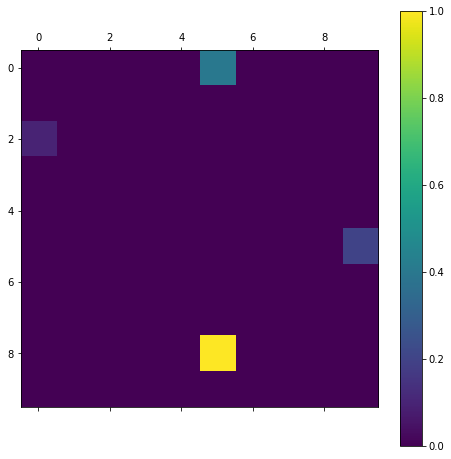

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plot_confusion_matrix(norm_conf_mx)
plt.show()


In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       1.00      1.00      1.00        10
           2       1.00      0.90      0.95        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       0.36      0.80      0.50        10
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        10
           8       0.00      0.00      0.00        10
           9       0.83      1.00      0.91        10

    accuracy                           0.83       100
   macro avg       0.81      0.83      0.81       100
weighted avg       0.81      0.83      0.81       100



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


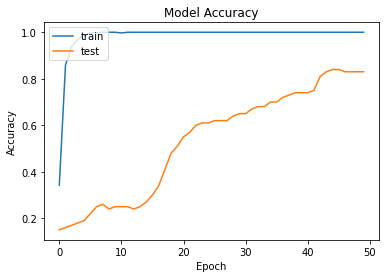

In [ ]:
k = ''
if 'accuracy' in history.history :
    k = 'accuracy'    

if 'acc' in history.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

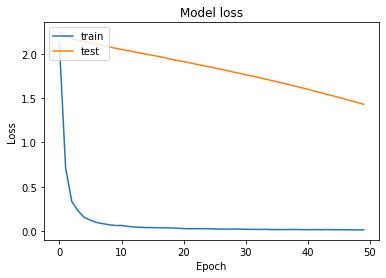

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



# References
[1] https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/<br>
[2] https://keras.io/api/applications/vgg/ <br>
[3] https://towardsdatascience.com/learning-curve-to-identify-overfitting-underfitting-problems-133177f38df5<br>
[4] https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/<br>